# analysis of pp-SRC c.m. momentum simulations

# imports

In [1]:
from notebook_tools import *
import ast
import matplotlib.patches as patches
generic = lambda x: ast.literal_eval(x)

%matplotlib inline

# read data

runs 20,000-30,000

sims0 = pd.read_csv( '/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs20000to30000_NsigmaT_10_NSigmaZa1_5_NSigmaZa2_8_NMeanZa1_5_NMeanZa2_5_NRand_10_simulationruns_results.csv')

runs 50,000 to 68,746

sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs50000to68746_NsigmaT_15_NSigmaZa1_10_NSigmaZa2_5_NMeanZa1_5_NMeanZa2_5_NRand_10_simulationruns_results.csv')

runs 100,000 to 200800

sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs100000to200799_10SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv')

sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs500000to5018543_30SigmaT_5SigmaZa1_5SigmaZa2_5MeanZa1_5MeanZa2_10NRand_results.csv',na_filter=0.0)

sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs600000to6018605_30SigmaT_5SigmaZa1_5SigmaZa2_5MeanZa1_5MeanZa2_10NRand_results.csv',na_filter=0.0)
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs700000to756268_100SigmaT_5SigmaZa1_5SigmaZa2_5MeanZa1_5MeanZa2_10NRand_results.csv',na_filter=0.0)
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs800000to1000000_20SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_20NRand_results.csv',na_filter=0.0)
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs1000000to1100000_20SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv',na_values=0.0)
sims = sims[sims.run>1000000]
sims.fillna(0,inplace=True)

In [4]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs1100000to1400000_30SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv',na_values=0.0)

In [5]:
sims = sims[(sims.run>1100000) & (sims.run<1400000)]
sims.fillna(0,inplace=True)

def convert_nan_to_0(var='PvalSigmaTMeanZa1_12C'):
    result=[ float(cell) if cell is not '' else 0.0 for cell in sims[var].values]
    sims[var] = result

for target in ['12C','27Al','56Fe','208Pb']:
    convert_nan_to_0('PvalTotal_unweighted_%s'%target)
    for corr in ['MeanZa1','MeanZa2','SigmaZa1','SigmaZa2']:
        convert_nan_to_0('PvalSigmaT'+corr+"_"+target)
    print 'completed nan to 0.0 for '+target

In [6]:
def draw_PvalWeighting(var='SigmaX', xlabel='',bins=50,target='12C',name='$^{12}C$',
                       PvalTotWeight=None,legend_loc='bbox',                       
                       x_range = None,                       
                       y_range = None,                       
                       xtext = None , ytext=None,                       
                       do_save_fig=False,
                       figsize=(10,10),                       
                       fontsize=20):
    weights=[sims.run/sims.run,sims['Pval'+var+'_weighted_'+target],sims['PvalTotal_unweighted_%s'%target]]#['PvalTotal_%s'%target]]    
    weighting_labels=['generated','weighted by $Pval(\\sigma_{x})$','weighted by $Pval(total)$']   

    if target=='12C' : 
        weights.append(sims.KStPval)
        weighting_labels.append('$KS-p_t$ weighted')
        
    histograms , bins = plot_1d_withoutandwithweight(sims['gen'+var],
                                                     weights=weights,
                                                     weighting_labels = weighting_labels,
                                                     bins=bins,
                                                     legend_loc=legend_loc,
                                                     xlabel=xlabel,
                                                     ylabel='1k runs weighted [a.u.]',
                                                     x_range=x_range,                                                    
                                                     y_range=y_range,
                                                    figsize=figsize,
                                                    fontsize=fontsize);
    do_show_gaussians = [False , True , True , False]
    
    for hw,weight,weighting_label,do_show_gaussian in zip(histograms,weights,weighting_labels,do_show_gaussians):
        mu = np.average(sims['gen'+var] , weights=weight)
        variance = np.average((sims['gen'+var]-mu)**2, weights=weight)
        sigma = np.sqrt(variance)                                                                           
        print weighting_label + ': \n mean=%.3f , stdev=%.3f'%(mu,sigma)
    
    if do_save_fig: 
        plt.text(0.26,0.7*np.max(histograms),name,fontsize=40)
        plt.tight_layout()
        plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/AcceptanceCorrection'+var+'_'+target+'.pdf')
    
def draw_PvalWeighting_2d( df , v1 , v2 , bins=40 ,
                          weights=None, w_label=None , cmap='Greys' ,
                          xlabel=None , ylabel=None ,                         
                          figsize=(10,10), title=None, do_save_fig=False):
    fig,ax=plt.subplots(figsize=figsize)
    plt.hist2d(df[v1],df[v2],bins=bins,weights=weights,cmap=cmap);
    ax.add_patch( patches.Rectangle((np.min(df[v1]), np.min(df[v2])),
                                     np.max(df[v1])-np.min(df[v1]) ,
                                     np.max(df[v2])-np.min(df[v2]),        
                                     fill=False, linewidth=2
                                    ))
#     print 'min of ',v1,'is',np.min(df[v1])
#     print 'max of ',v1,'is',np.max(df[v1])
#     print 'min of ',v2,'is',np.min(df[v2])
#     print 'max of ',v2,'is',np.max(df[v2])
    ax.set_ylim(np.min(df[v2])-0.1*np.abs(np.min(df[v2])),np.max(df[v2])+0.1*np.abs(np.max(df[v2])))
    ax.set_xlim(np.min(df[v1])-0.1*np.abs(np.min(df[v1])),np.max(df[v1])+0.1*np.abs(np.max(df[v1])))

    cb=plt.colorbar()
    cb.ax.tick_params(labelsize=30)
    set_axes( ax , xlabel , ylabel , fontsize=30)
    if do_save_fig: 
#         plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/AccCorr_'+v1+'_'+v2+'_'+w_label+'.pdf')
        
        plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/Appendix_D/figures/AccCorr_'+v1+'_'+v2+'_'+w_label+'.pdf')
    
    
def draw_all_PvalWeighting_2d(v1='SigmaZa1' , v2='SigmaZa2' ,
                              xlabel='$\\sigma_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                              bins=40,
                              figsize=(10,10),
                              weights=None,
                              w_labels=None,
                              cmaps=None,
                              do_save_fig=False,
                              draw_generated=False):
    
    for weight,w_label,cmap in zip(weights,w_labels,cmaps):
        
        if weight is None:
            if draw_generated:
                draw_PvalWeighting_2d( sims , 'gen'+v1 , 'gen'+v2 , bins=bins , weights=weight, w_label=w_label  , cmap=cmap ,
                                  xlabel=xlabel,ylabel=ylabel, figsize=figsize , title='no weighting' , do_save_fig=do_save_fig);
        else:
            print 'ploting histogram weighted by',weight
            title=weight
            weight=sims[weight]
            draw_PvalWeighting_2d( sims , 'gen'+v1 , 'gen'+v2 , bins=bins , weights=weight, w_label=w_label  , cmap=cmap ,
                                  xlabel=xlabel,ylabel=ylabel, figsize=figsize , title=title , do_save_fig=do_save_fig);
        
        
def plot_SigmaT_correlationWithOthers(v2='SigmaZa1',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]',binsy=30,
                                      v1='SigmaX',xlabel='$\\sigma_{x}$ [Gev/c]', binsx=30,
                                      target='12C',do_save_fig=False): 
    weights = [None , 'PvalSigmaT%s_%s'%(v2,target) , 'PvalTotal_unweighted_%s'%target, 'PvalTotal'  ]
    w_labels = ['NoWeights','PvalSigmaT%s_%s'%(v2,target),'PvalTotal_%s'%target,'PvalTotal_%s'%target]
    cmaps = ['hot_r','hot_r','hot_r','hot_r']

    draw_all_PvalWeighting_2d(v1=v1 , v2=v2 ,
                              xlabel=xlabel,ylabel=ylabel ,
                              bins=(binsx,binsy),
                              figsize=(15,10),
                              weights=weights, 
                              w_labels=w_labels,
                              cmaps=cmaps,
                              do_save_fig=do_save_fig)


# histograms of generated, and generated+weighted

In [8]:
# PvalTotal
sims[sims.PvalTotal_unweighted_12C<0.001].PvalTotal_unweighted_12C=0
sims['PvalTotal'] = Fisher_combination_Pvals_pandas([sims.PvalSigmaX_unweighted_12C,
                                                     sims.PvalSigmaY_unweighted_12C,
                                                     sims.PvalSigmaZa1_unweighted_12C,
                                                     sims.PvalSigmaZa2_unweighted_12C,
                                                     sims.PvalMeanZa1_unweighted_12C,
                                                     sims.PvalMeanZa2_unweighted_12C
                                                    ])
# PvalTotal=[ r if r>0.001 else 0 for r in sims.PvalTotal ]

/usr/local/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


ploting histogram weighted by PvalSigmaTSigmaZa1_12C
ploting histogram weighted by PvalTotal_unweighted_12C
ploting histogram weighted by PvalTotal
ploting histogram weighted by PvalSigmaTSigmaZa2_12C
ploting histogram weighted by PvalTotal_unweighted_12C
ploting histogram weighted by PvalTotal
ploting histogram weighted by PvalSigmaTMeanZa1_12C
ploting histogram weighted by PvalTotal_unweighted_12C
ploting histogram weighted by PvalTotal
ploting histogram weighted by PvalSigmaTMeanZa2_12C
ploting histogram weighted by PvalTotal_unweighted_12C
ploting histogram weighted by PvalTotal


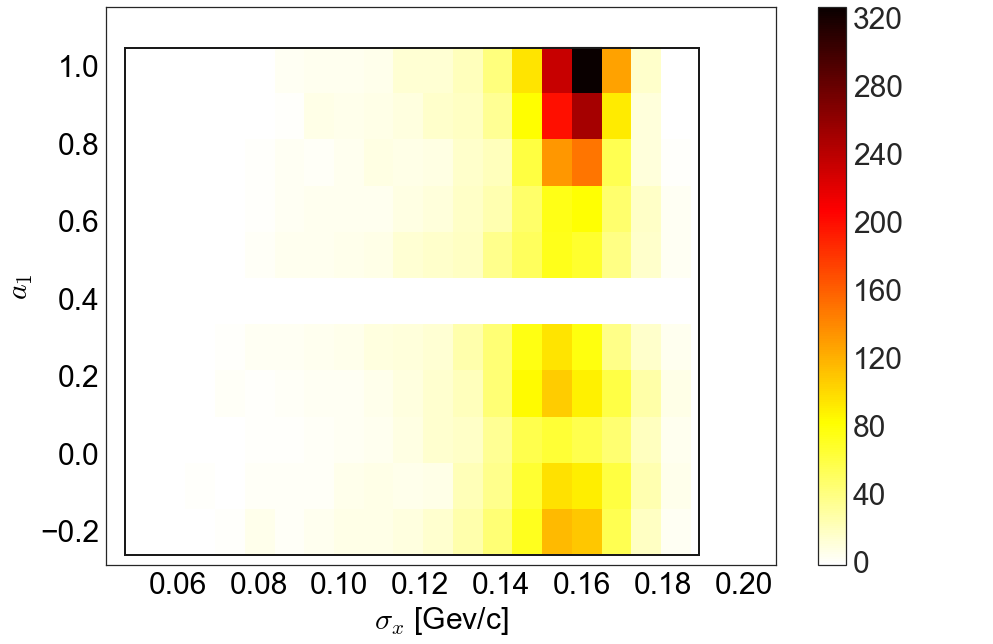

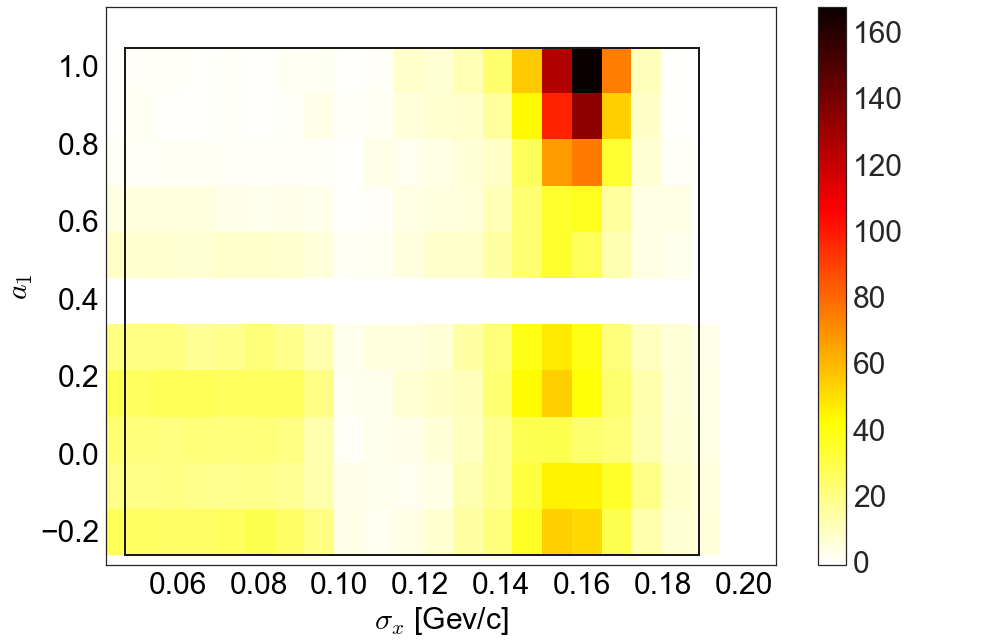

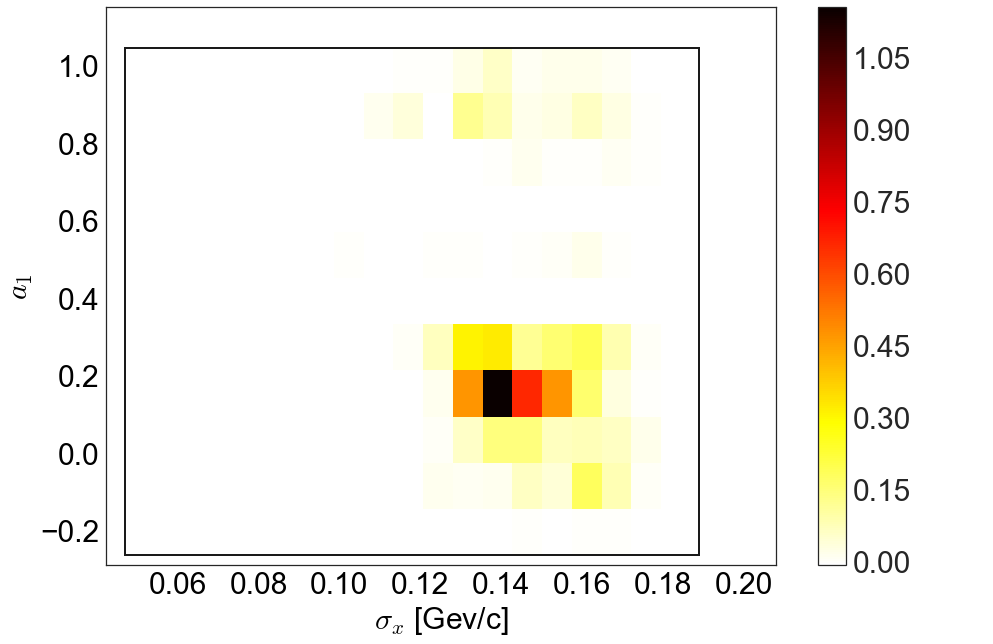

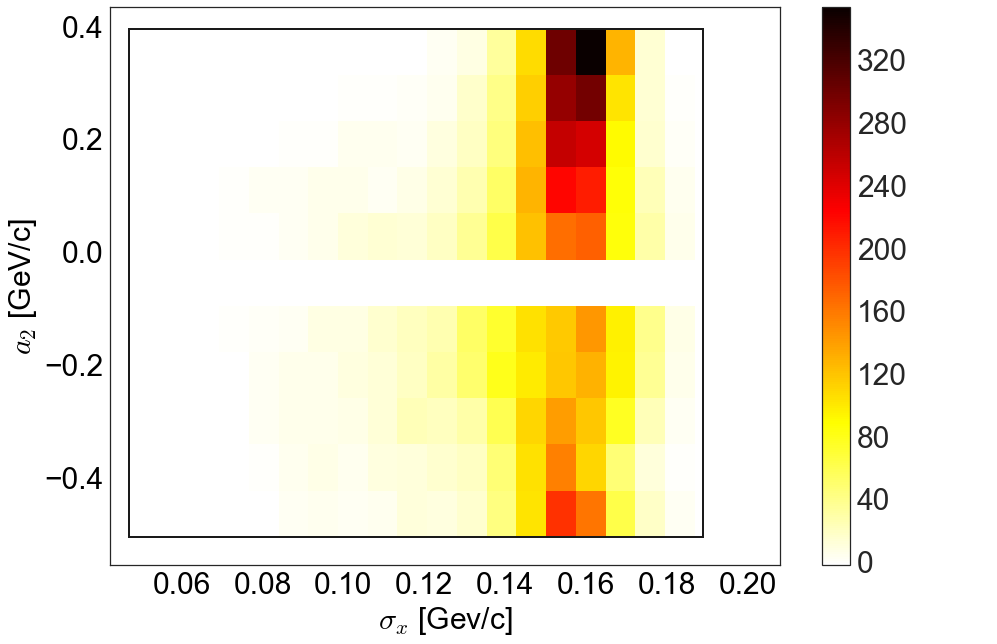

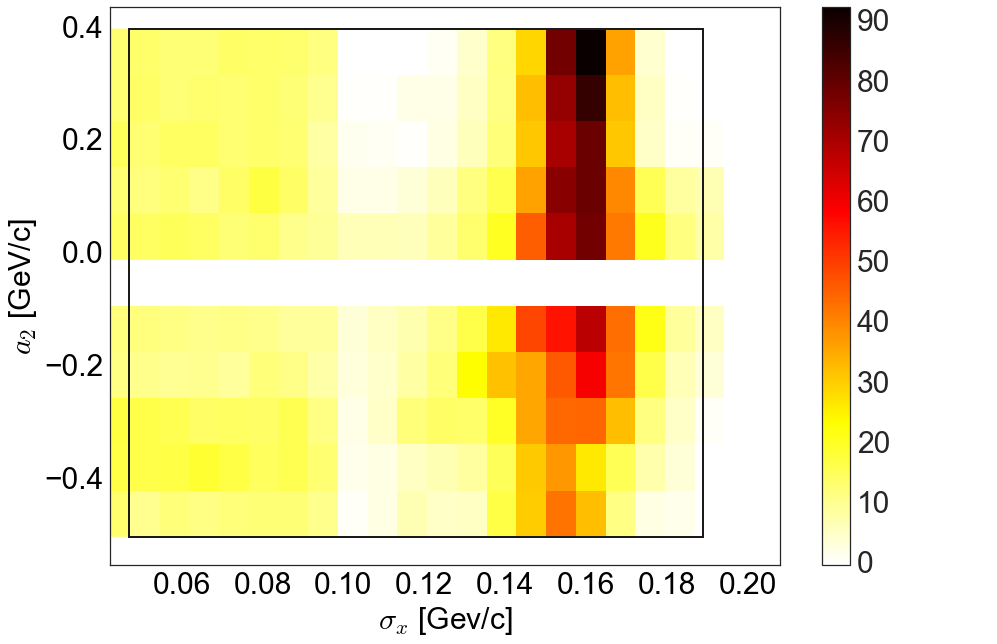

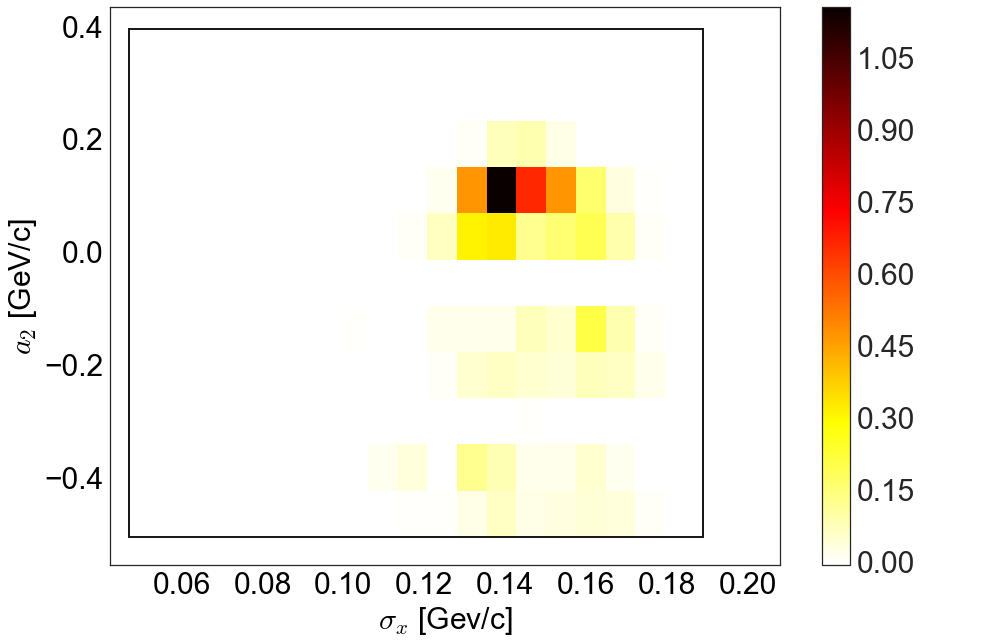

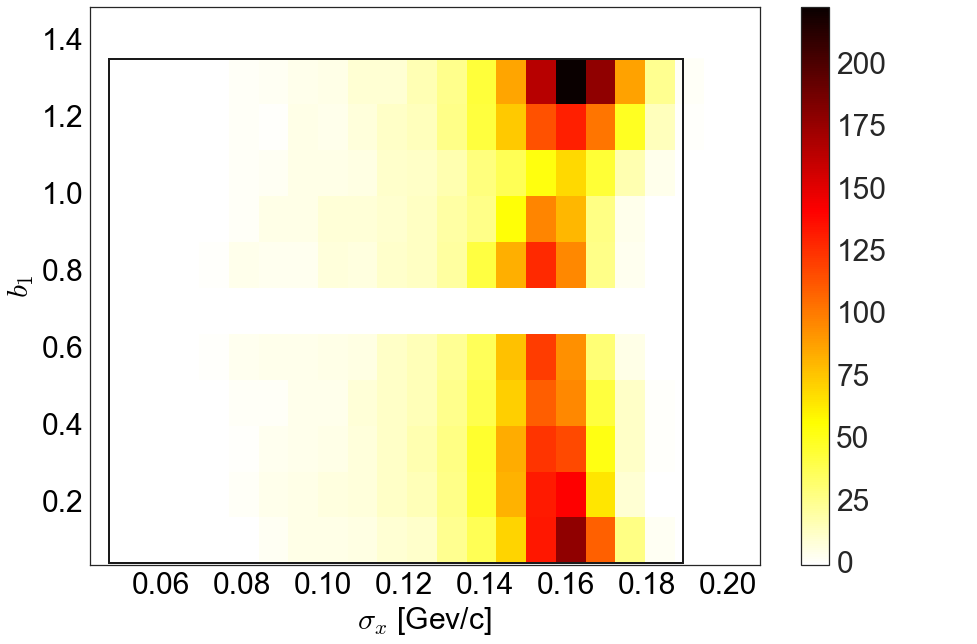

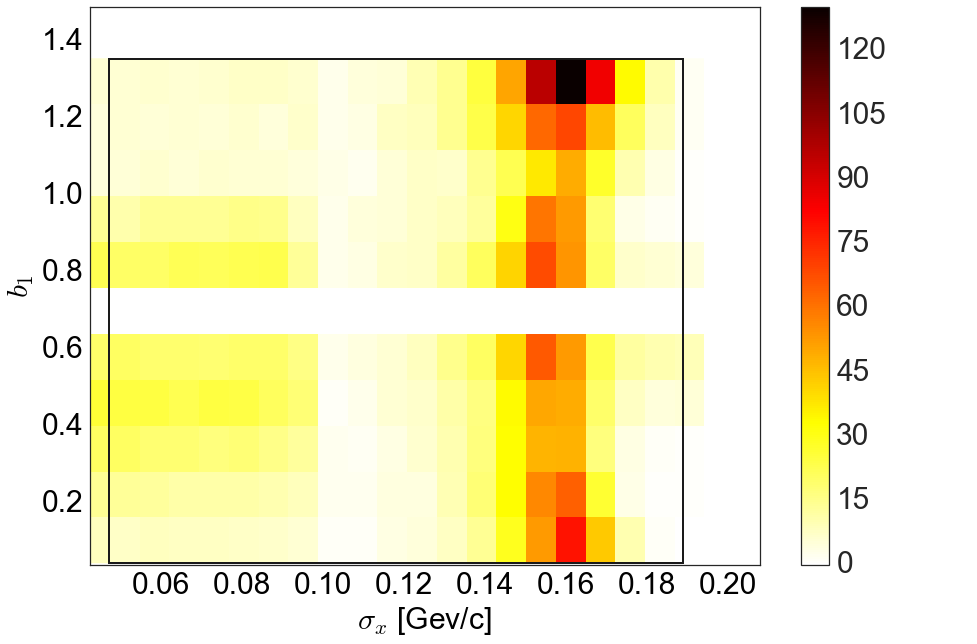

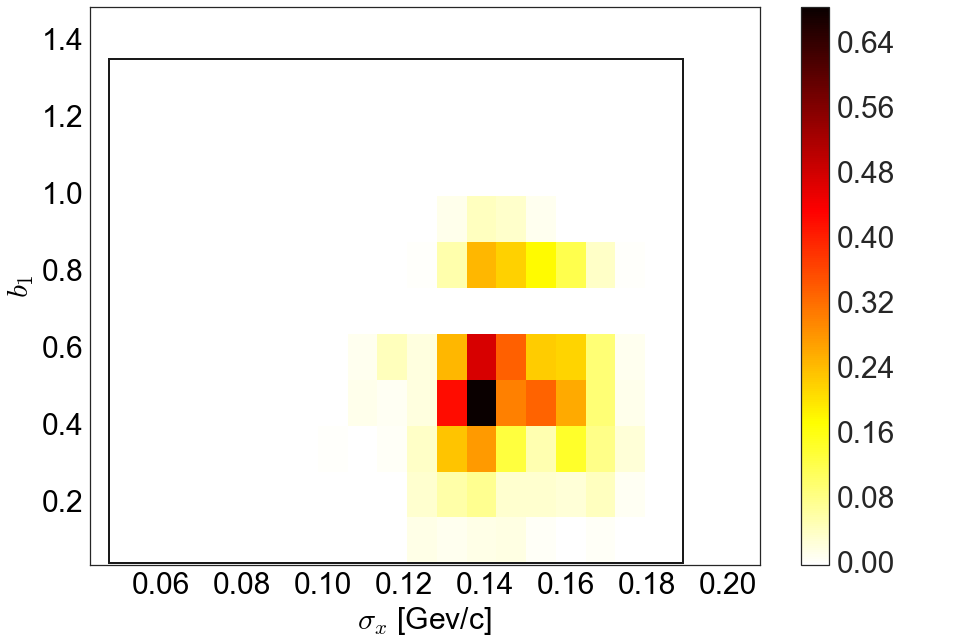

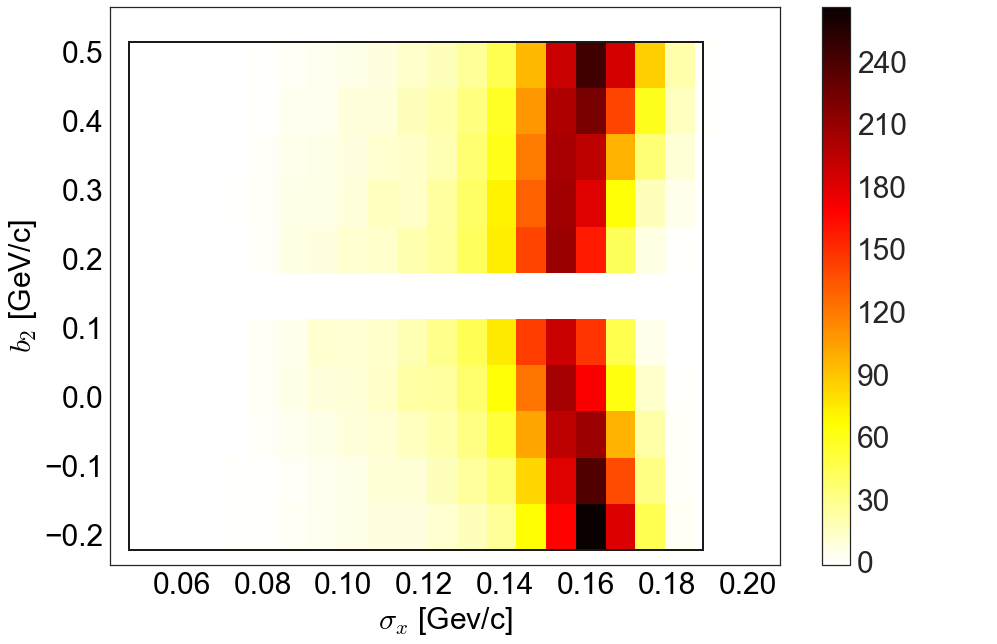

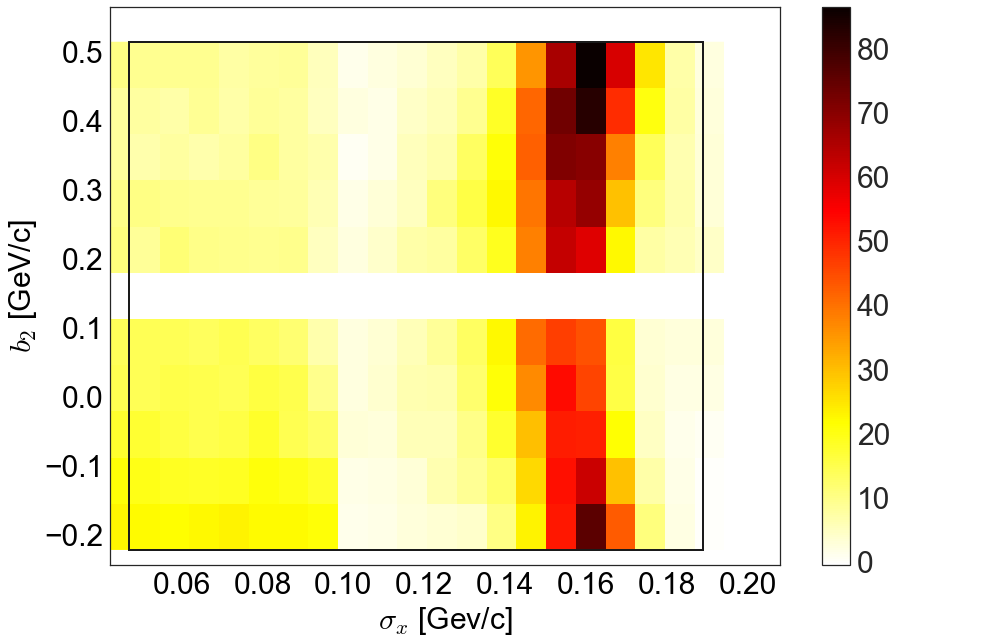

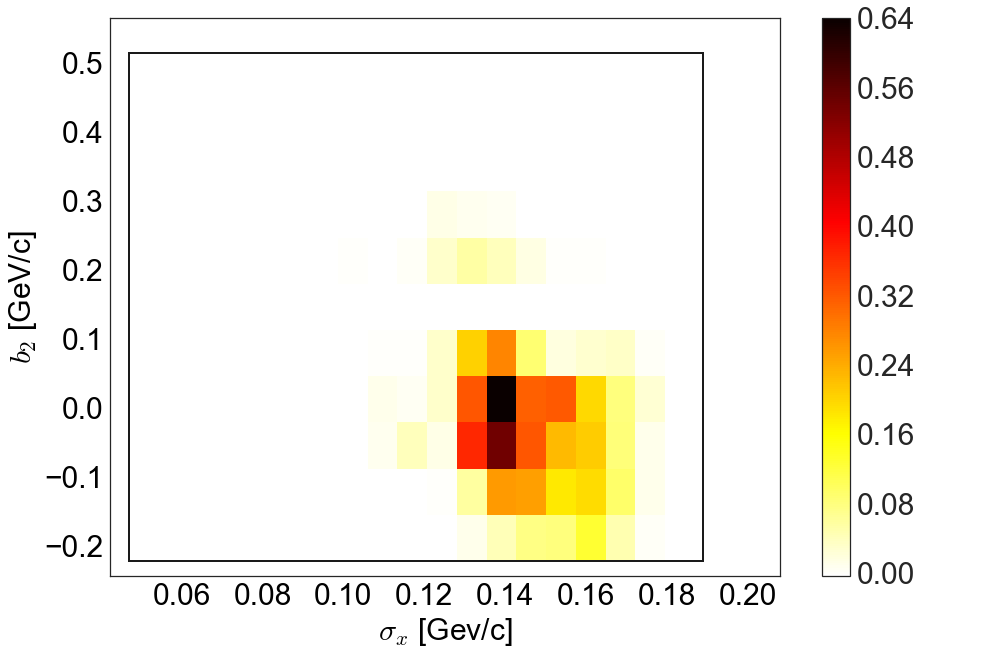

In [14]:
do_save_fig=True
binsx=np.linspace(0.04,0.26,31)
binsy=11
plot_SigmaT_correlationWithOthers(v2='SigmaZa1',ylabel='$a_{1}$',do_save_fig=do_save_fig,binsx=binsx,binsy=binsy)
plot_SigmaT_correlationWithOthers(v2='SigmaZa2',ylabel='$a_{2}$ [GeV/c]',do_save_fig=do_save_fig,binsx=binsx,binsy=binsy)
plot_SigmaT_correlationWithOthers(v2='MeanZa1',ylabel='$b_{1}$',do_save_fig=do_save_fig,binsx=binsx,binsy=binsy)
plot_SigmaT_correlationWithOthers(v2='MeanZa2',ylabel='$b_{2}$ [GeV/c]',do_save_fig=do_save_fig,binsx=binsx,binsy=binsy)

generated: 
 mean=0.150 , stdev=0.052
weighted by $Pval(\sigma_{x})$: 
 mean=0.153 , stdev=0.020
weighted by $Pval(total)$: 
 mean=0.149 , stdev=0.028
$KS-p_t$ weighted: 
 mean=0.148 , stdev=0.018
generated: 
 mean=0.150 , stdev=0.052
weighted by $Pval(\sigma_{x})$: 
 mean=0.142 , stdev=0.027
weighted by $Pval(total)$: 
 mean=0.151 , stdev=0.020
generated: 
 mean=0.150 , stdev=0.052
weighted by $Pval(\sigma_{x})$: 
 mean=0.162 , stdev=0.023
weighted by $Pval(total)$: 
 mean=0.166 , stdev=0.023
generated: 
 mean=0.150 , stdev=0.052
weighted by $Pval(\sigma_{x})$: 
 mean=0.181 , stdev=0.027
weighted by $Pval(total)$: 
 mean=0.160 , stdev=0.033


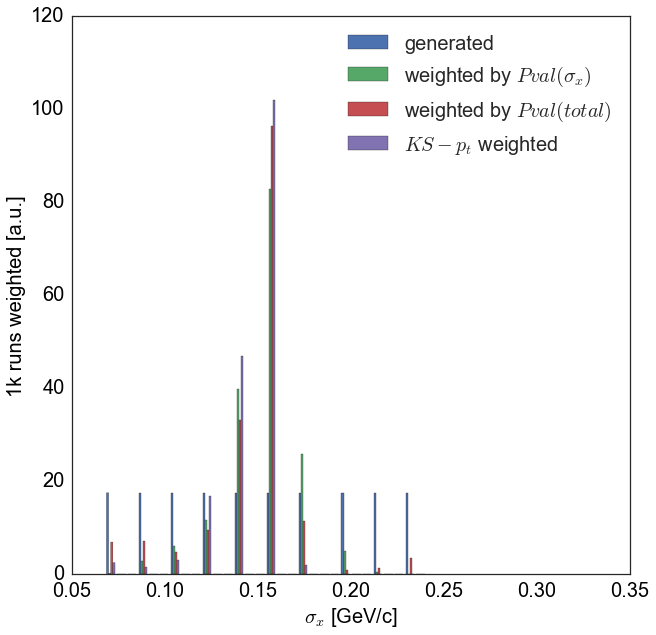

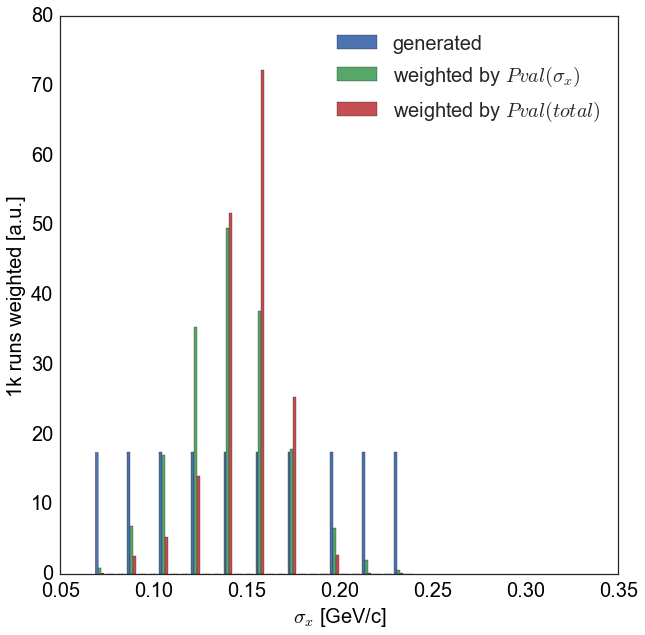

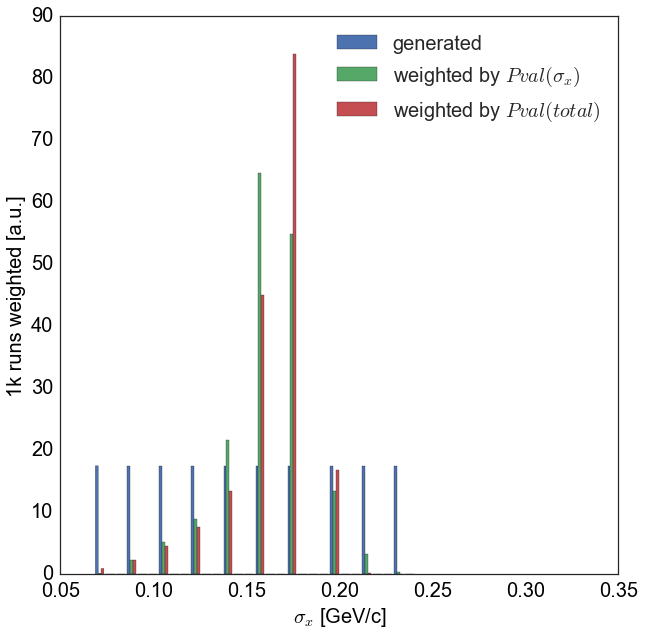

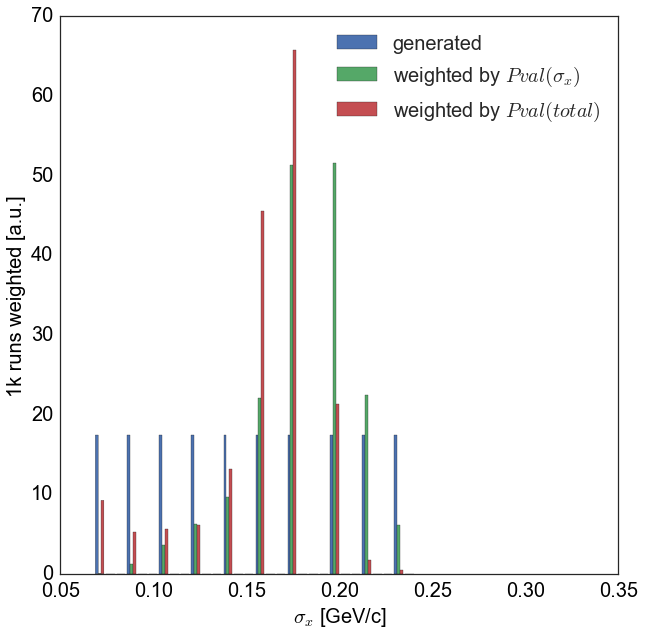

In [68]:
for target,name in zip(['12C','27Al','56Fe','208Pb'],['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb']):
    draw_PvalWeighting(var='SigmaX',xlabel='$\\sigma_{x}$ [GeV/c]',bins=30,x_range=(0.05,0.35),
                       target=target,name=name,
                       legend_loc='upper right',do_save_fig=False)

# generated-reconstructed

In [8]:
# read all our runs results
sims_files = []
sims_list , sims_files = os.listdir('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/') , [] 
for file in sims_list:                                                                                        
    print 'adding ',file
    sims_files.append(pd.read_csv(('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/'+file)))

sims_all=pd.concat(sims_files)  
print 'len:',len(sims_all) 

adding  runs1000000to1100000_20SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv
adding  runs1100000to1400000_30SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv
adding  runs600000to6018605_30SigmaT_5SigmaZa1_5SigmaZa2_5MeanZa1_5MeanZa2_10NRand_results.csv
len: 423786


In [18]:
def plot_parameter_generated_reconstructed(par='SigmaX',par_name='sigma_t',par_label='$\\sigma_t$',
                                           units='[GeV/c]',
                                           bins=np.linspace(0.05,0.35,30), do_save_plots=False,
                                           bins_diff=np.linspace(-0.05,0.15,40)):
    fig,ax=plt.subplots(figsize=(20,10))

    plt.hist2d(sims_all['gen'+par],sims_all['rec'+par+'_unweighted'],
               bins=(bins,bins),cmap='hot_r');
    cb=plt.colorbar()
    cb.ax.tick_params(labelsize=30)
    set_axes( ax , 'generated %s %s'%(par_label,units) , 'reconstructed %s %s'%(par_label,units) , fontsize=30)
    if do_save_plots: fig.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/Appendix_D/figures/generated_vs_reconstructed_%s.pdf'%par_name)


    fig,ax=plt.subplots(figsize=(20,10))
    plt.hist2d(sims_all['gen'+par],sims_all['rec'+par+'_unweighted'],
               weights=sims_all.PvalTotal_unweighted_12C,bins=(bins,bins),cmap='hot_r');
    cb=plt.colorbar()
    cb.ax.tick_params(labelsize=30)
    set_axes( ax , 'generated %s %s'%(par_label,units) , 'reconstructed %s %s'%(par_label,units) , fontsize=30)
    if do_save_plots: fig.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/Appendix_D/figures/generated_vs_reconstructed_%s_weighted.pdf'%par_name)


    fig,ax=plt.subplots(figsize=(20,10))
    x = sims_all['rec'+par+'_unweighted'] - sims_all['gen'+par]
    plt.hist([x,x],weights=[np.ones(len(x)),sims_all.PvalTotal_unweighted_12C],
             label=['non-weighted','weighted by $Pval(tot)$'],normed=1,
             bins=bins_diff)
    plt.legend(fontsize=25)
    ax.set_xlim(bins_diff.min(),bins_diff.max())
    set_axes( ax , '%s(reconstructed)-%s(generated) %s'%(par_label,par_label,units) , '' , fontsize=30)
    if do_save_plots: fig.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/Appendix_D/figures/gen_rec_%s.pdf'%par_name)

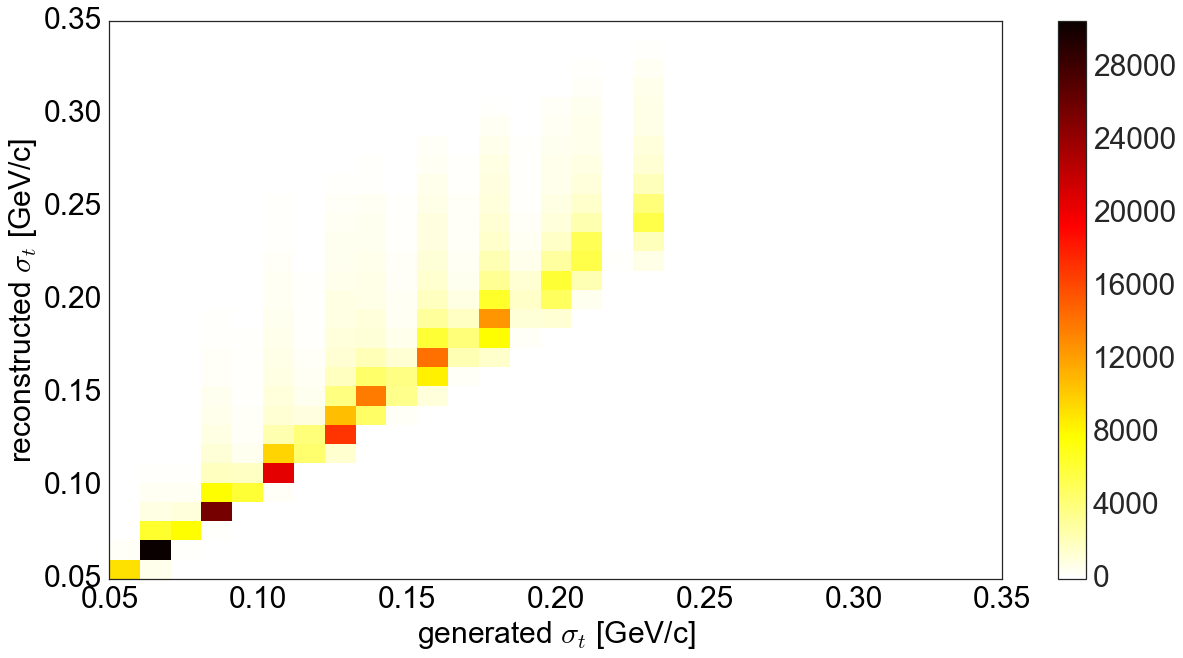

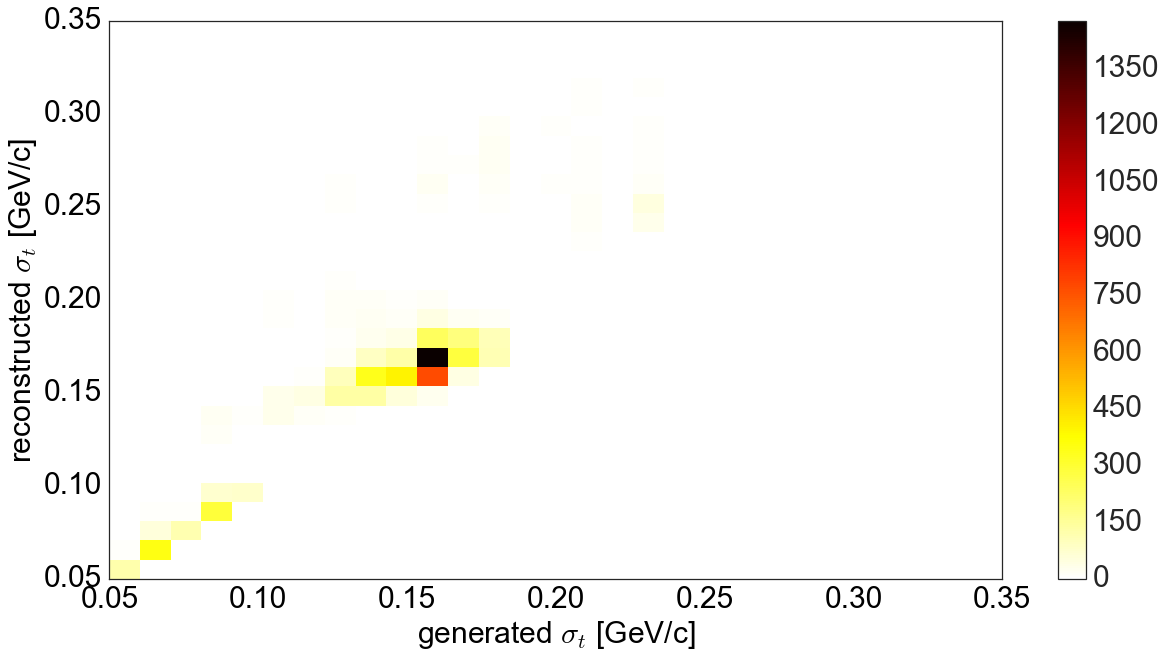

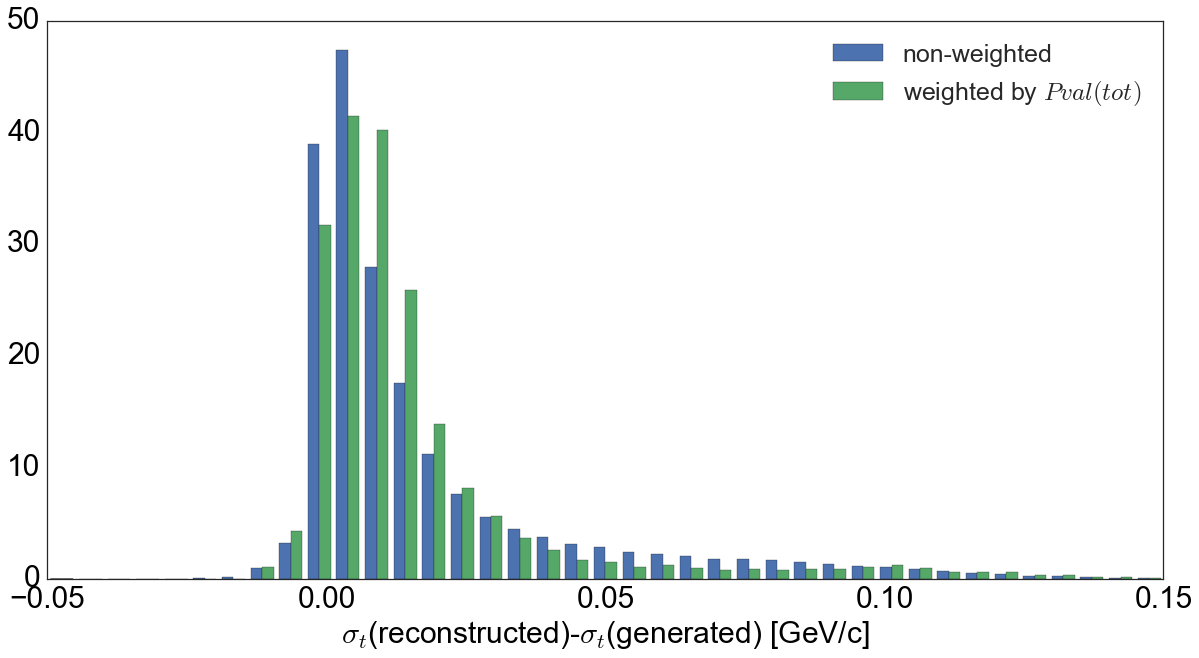

In [25]:
plot_parameter_generated_reconstructed(bins=np.linspace(0.05,0.35,30),bins_diff=np.linspace(-0.05,0.15,40),
                                      do_save_plots=True)

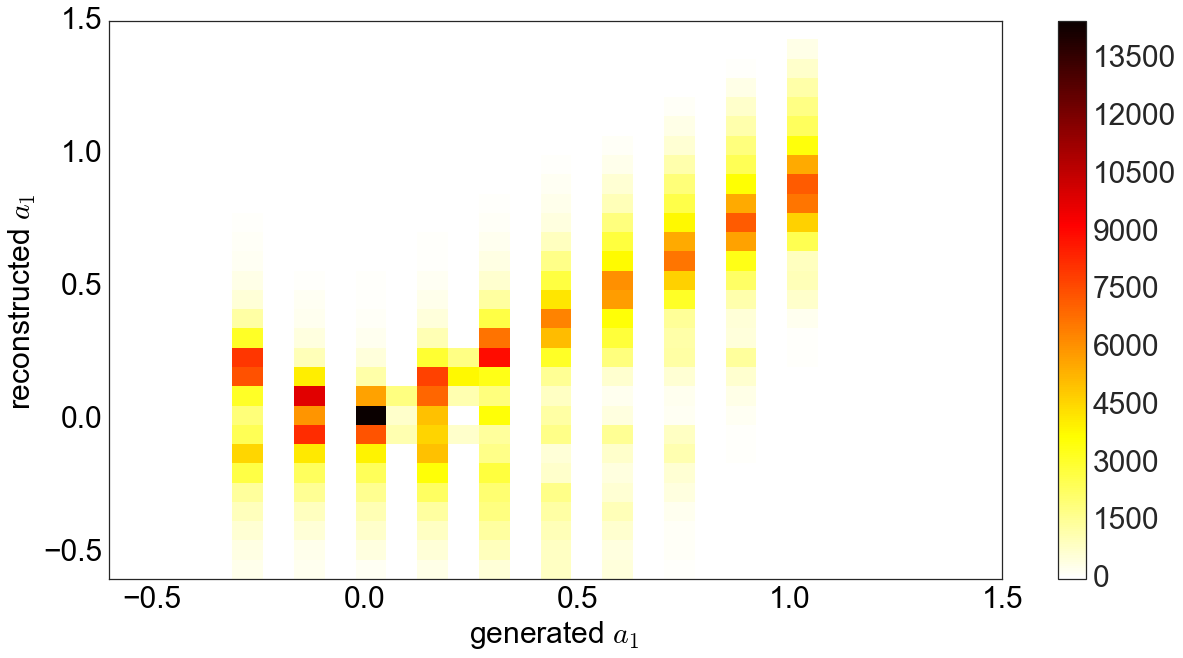

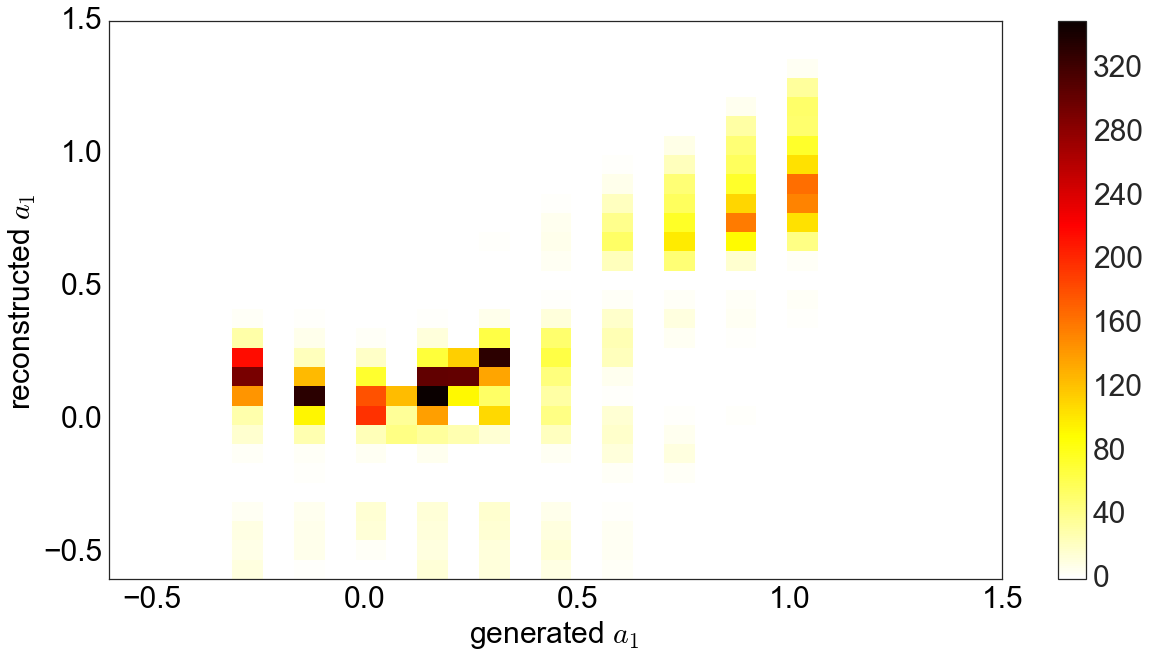

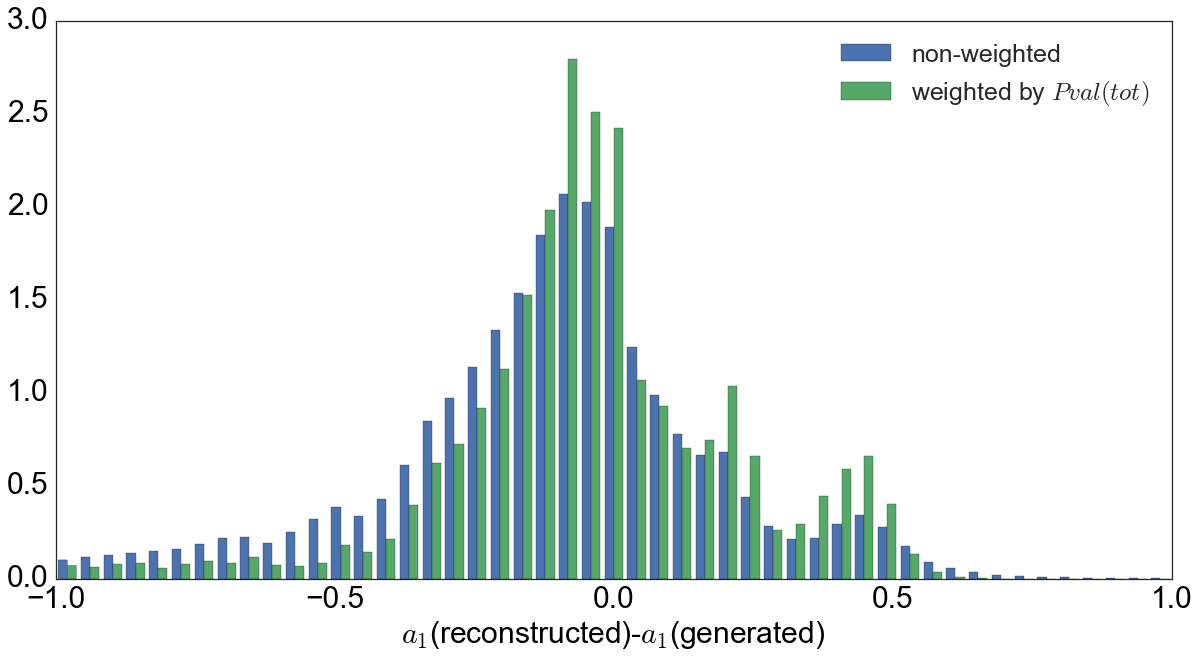

In [32]:
plot_parameter_generated_reconstructed(par='SigmaZa1',par_name='a1',par_label='$a_1$',units='',
                                       bins=np.linspace(-0.6,1.5,30),bins_diff=np.linspace(-1.,1.,50),
                                      do_save_plots=True)

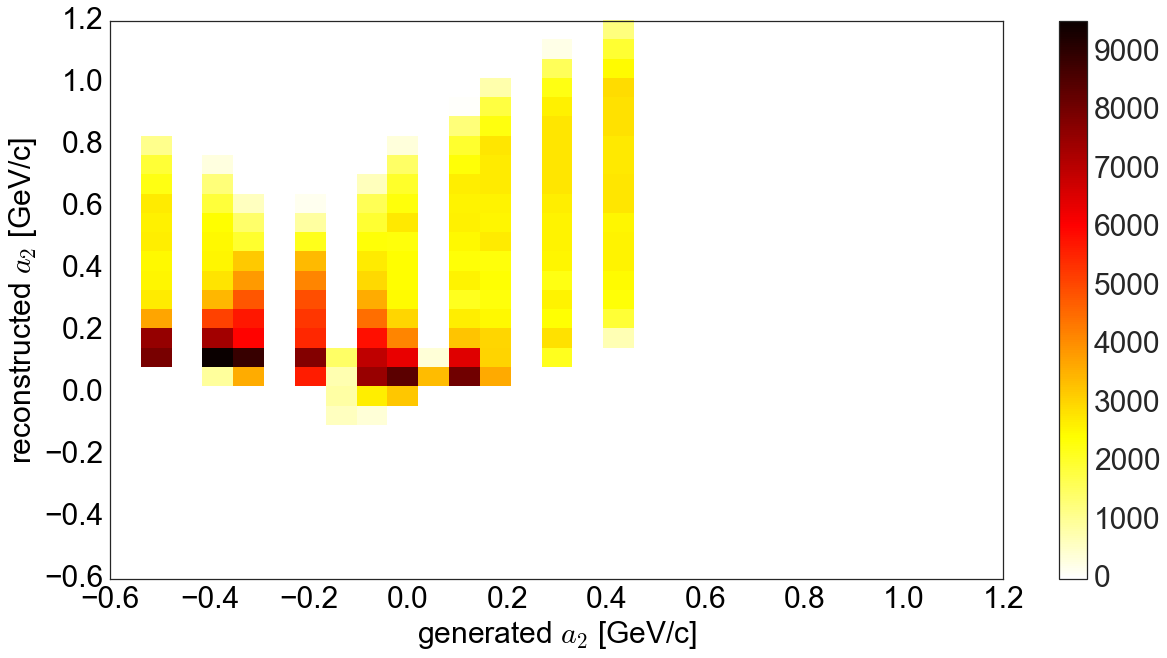

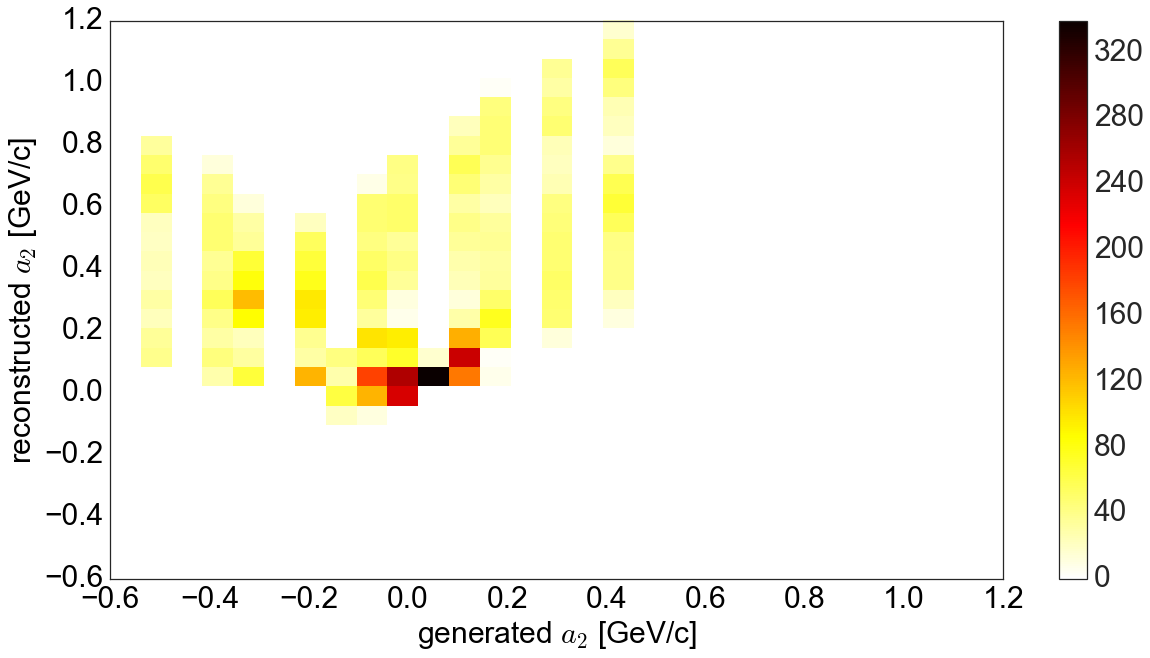

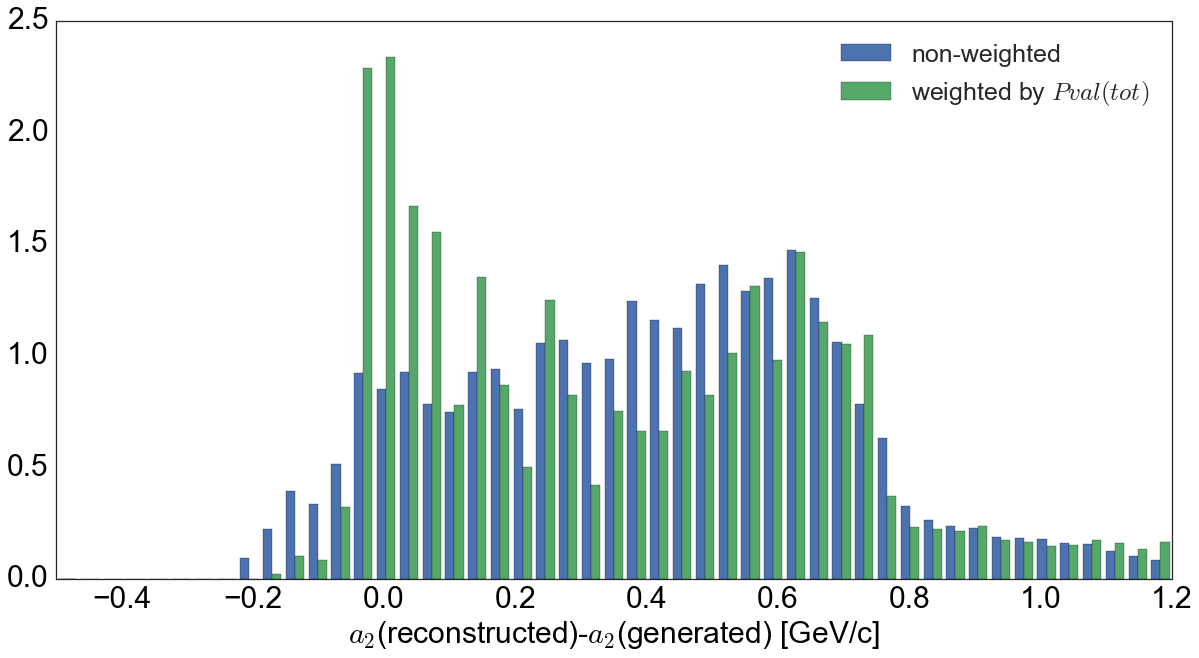

In [33]:
plot_parameter_generated_reconstructed(par='SigmaZa2',par_name='a2',par_label='$a_2$',
                                       bins=np.linspace(-0.6,1.2,30),bins_diff=np.linspace(-.5,1.2,50),
                                      do_save_plots=True)

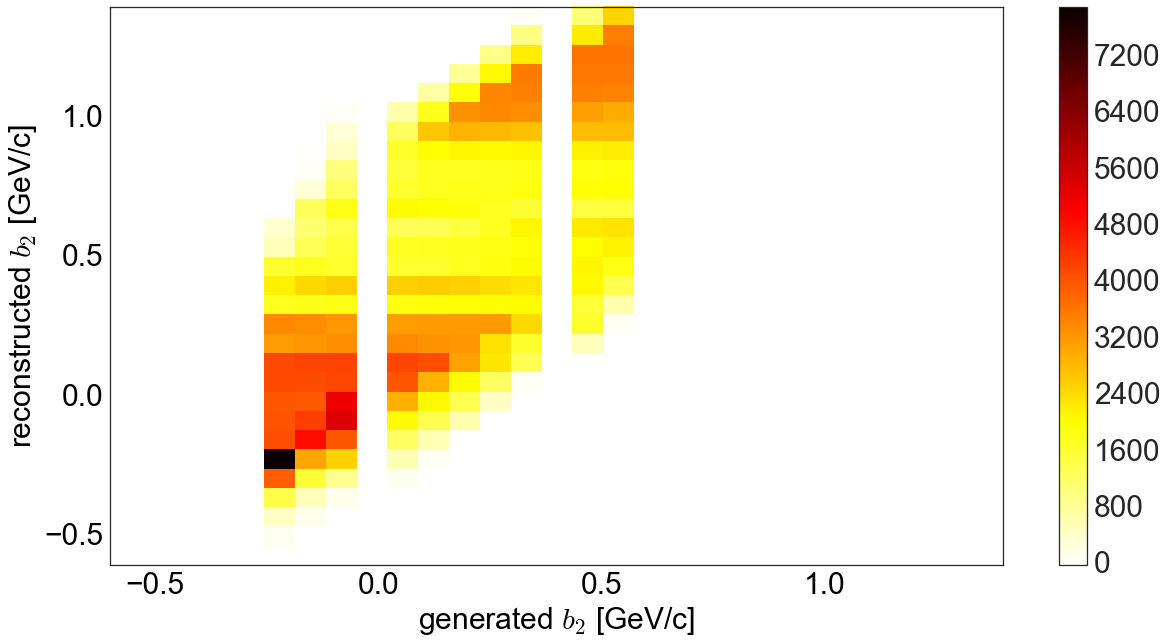

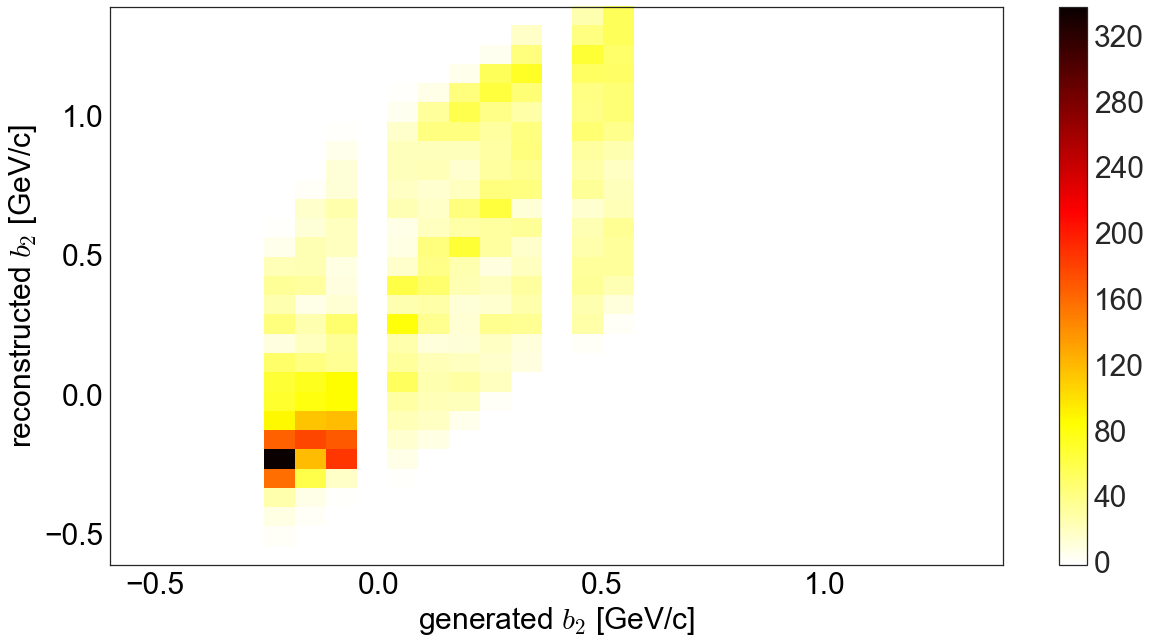

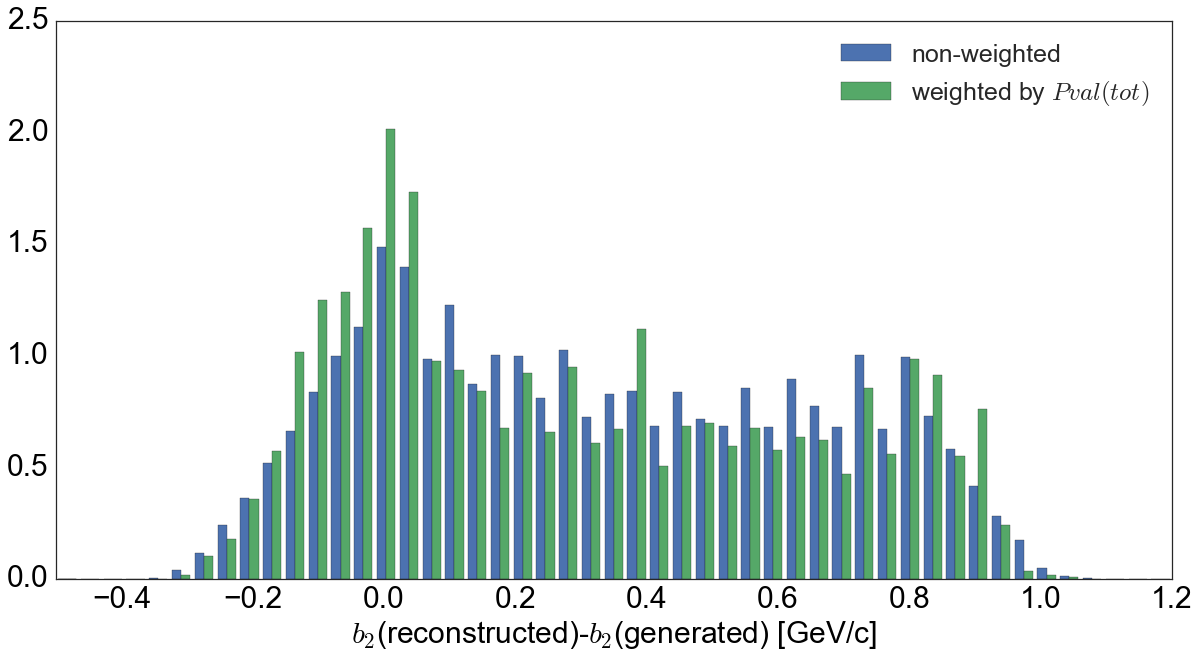

In [35]:
plot_parameter_generated_reconstructed(par='MeanZa2',par_name='b2',par_label='$b_2$',
                                       bins=np.linspace(-0.6,1.4,30),bins_diff=np.linspace(-.5,1.2,50),
                                      do_save_plots=True)

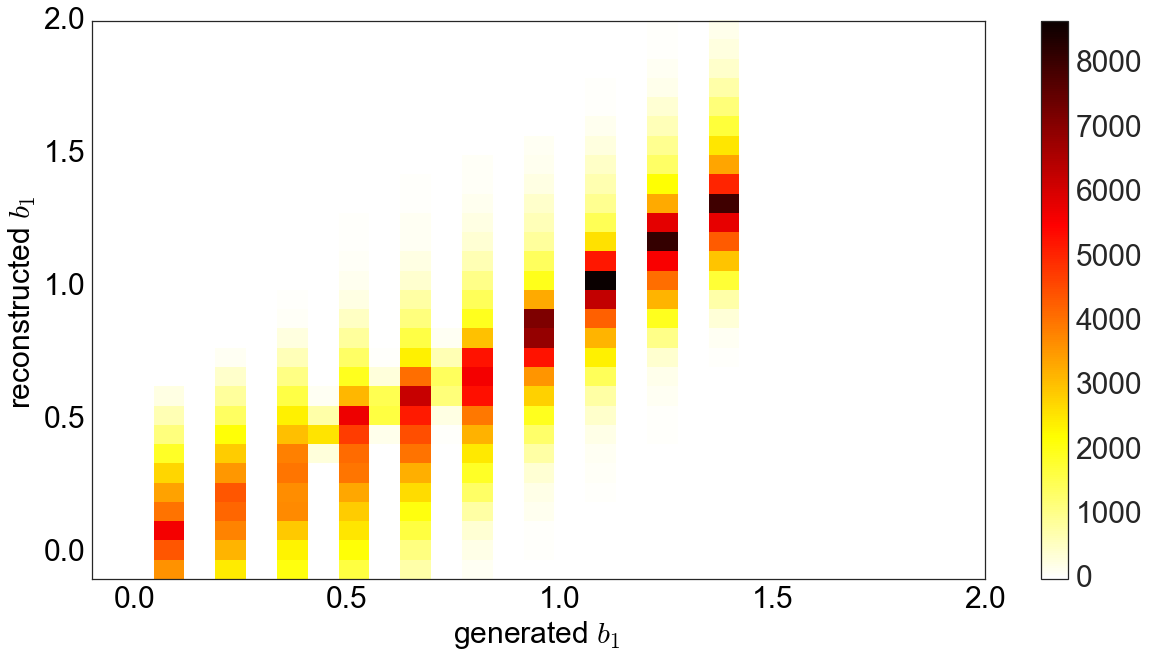

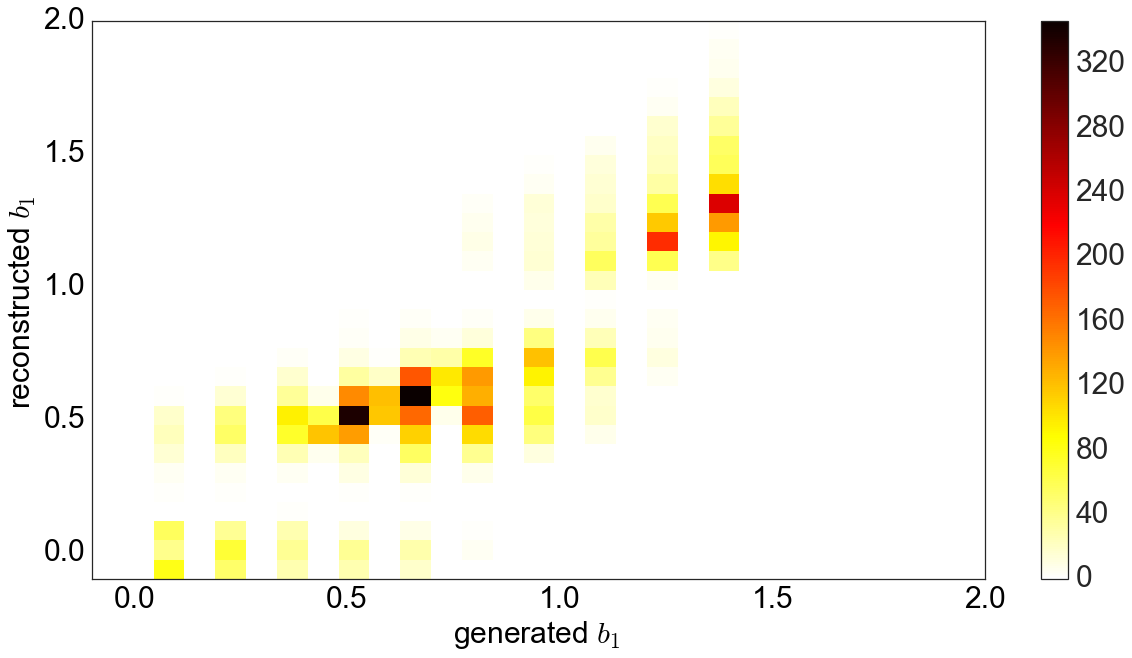

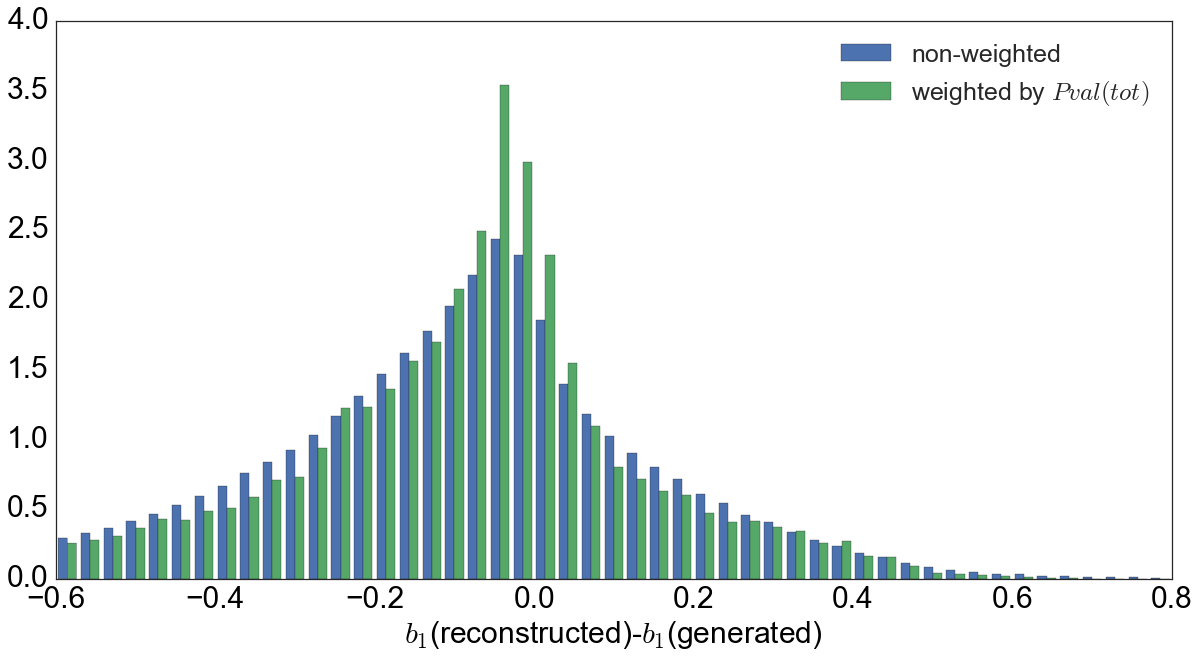

In [39]:
plot_parameter_generated_reconstructed(par='MeanZa1',par_name='b1',par_label='$b_1$',units='',
                                       bins=np.linspace(-0.1,2.0,30),bins_diff=np.linspace(-.6,0.8,50),
                                      do_save_plots=True)